In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
model_name = 'VGG'
dataset_name = 'CIFAR10'
init_param_path = '/Users/yifanlu/Desktop/init_param_' + model_name + '_' + dataset_name + '.pth'
final_param_path = '/Users/yifanlu/Desktop/final_param_' + model_name + '_' + dataset_name + '.pth'
#init_param_path = '/Users/yifanlu/Desktop/init_param_LeNet5_MNIST_train_index.pth'
#final_param_path = '/Users/yifanlu/Desktop/final_param_LeNet5_MNIST_train_index.pth'
init_param_dict = torch.load(init_param_path, map_location=torch.device('cpu'))
final_param_dict = torch.load(final_param_path, map_location=torch.device('cpu'))

In [3]:
for (key,layer_weights_tensor) in init_param_dict.items():
    print(key)

features.0.weight
features.0.bias
features.1.weight
features.1.bias
features.1.running_mean
features.1.running_var
features.1.num_batches_tracked
features.3.weight
features.3.bias
features.4.weight
features.4.bias
features.4.running_mean
features.4.running_var
features.4.num_batches_tracked
features.7.weight
features.7.bias
features.8.weight
features.8.bias
features.8.running_mean
features.8.running_var
features.8.num_batches_tracked
features.10.weight
features.10.bias
features.11.weight
features.11.bias
features.11.running_mean
features.11.running_var
features.11.num_batches_tracked
features.14.weight
features.14.bias
features.15.weight
features.15.bias
features.15.running_mean
features.15.running_var
features.15.num_batches_tracked
features.17.weight
features.17.bias
features.18.weight
features.18.bias
features.18.running_mean
features.18.running_var
features.18.num_batches_tracked
classifier.0.weight
classifier.0.bias
classifier.1.weight
classifier.1.bias
classifier.1.running_mean
c

In [4]:
init_weights_array = np.zeros(0)
for (key,layer_weights_tensor) in init_param_dict.items():
    if 'weight' in key:
        print(key)
        init_weights_array = np.append(init_weights_array, layer_weights_tensor)

final_weights_array = np.zeros(0)
for (key,layer_weights_tensor) in final_param_dict.items():
    if 'weight' in key:
        print(key)
        final_weights_array = np.append(final_weights_array, layer_weights_tensor)

features.0.weight
features.1.weight
features.3.weight
features.4.weight
features.7.weight
features.8.weight
features.10.weight
features.11.weight
features.14.weight
features.15.weight
features.17.weight
features.18.weight
classifier.0.weight
classifier.1.weight
classifier.3.weight
classifier.4.weight
classifier.6.weight
features.0.weight
features.1.weight
features.3.weight
features.4.weight
features.7.weight
features.8.weight
features.10.weight
features.11.weight
features.14.weight
features.15.weight
features.17.weight
features.18.weight
classifier.0.weight
classifier.1.weight
classifier.3.weight
classifier.4.weight
classifier.6.weight


In [5]:
init_weights_array.shape

(14025856,)

In [6]:
final_weights_array.shape

(14025856,)

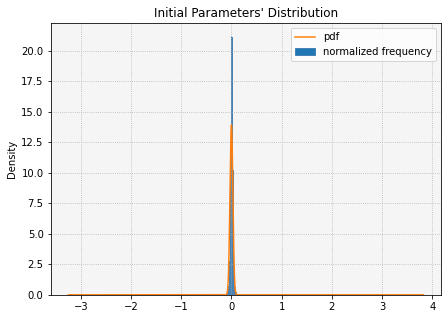

In [12]:
fig, ax = plt.subplots(figsize=(7,5),nrows=1, ncols=1)
fig.patch.set_facecolor('w')
ax.grid(linestyle='dotted')
ax.set_facecolor('whitesmoke')
ax.set_ylabel('Density')
bin_edges = np.histogram(init_weights_array,bins=5000)[1]
plt.hist(init_weights_array,bins=5000, edgecolor='steelblue',density=True, stacked=True)
loc, std = stats.norm.fit(init_weights_array)
plt.plot(bin_edges,stats.norm.pdf(bin_edges, loc=loc, scale=std))
ax.legend(['pdf','normalized frequency'])
ax.title.set_text('Initial Parameters\' Distribution')
plt.show()
fig_name = 'init_weights_distribution_' + model_name + '_' + dataset_name + '_train_index.png'
fig.savefig(fig_name)

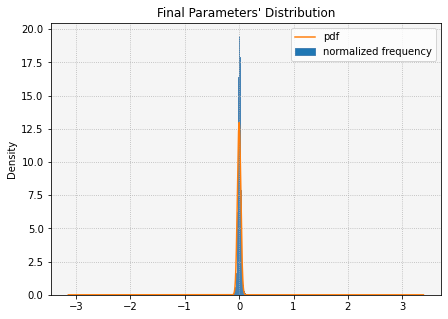

In [13]:
fig, ax = plt.subplots(figsize=(7,5),nrows=1, ncols=1)
fig.patch.set_facecolor('w')
ax.grid(linestyle='dotted')
ax.set_facecolor('whitesmoke')
ax.set_ylabel('Density')
bin_edges = np.histogram(final_weights_array,bins=5000)[1]
plt.hist(final_weights_array,bins=5000, edgecolor='steelblue',density=True, stacked=True)
loc, std = stats.norm.fit(final_weights_array)
plt.plot(bin_edges,stats.norm.pdf(bin_edges, loc=loc, scale=std))
ax.legend(['pdf','normalized frequency'])
ax.title.set_text('Final Parameters\' Distribution')
plt.show()
fig_name = 'final_weights_distribution_' + model_name + '_' + dataset_name + '_train_index.png'
fig.savefig(fig_name)

------

In [ ]:
prune_param_path = '/Users/yifanlu/Desktop/prune_param_LeNet5_MNIST_from_start.pth'
prune_param_dict = torch.load(prune_param_path, map_location=torch.device('cpu'))

In [ ]:
prune_weights_array = np.zeros(0)
prune_weights_orig = []
prune_weights_mask = []
for (key,value) in prune_param_dict.items():
    if 'weight_orig' in key:
        print(key)
        prune_weights_orig.append(value)
    elif 'weight_mask' in key:
        print(key)
        prune_weights_mask.append(value)
for idx in range(len(prune_weights_orig)):
    weights = prune_weights_orig[idx] * prune_weights_mask[idx]
    prune_weights_array = np.append(prune_weights_array, weights)

In [ ]:
prune_weights_array = prune_weights_array[prune_weights_array!=0]

In [ ]:
fig, ax = plt.subplots(figsize=(7,5),nrows=1, ncols=1)
fig.patch.set_facecolor('w')
ax.grid(linestyle='dotted')
ax.set_facecolor('whitesmoke')
ax.set_ylabel('Density')
bin_edges = np.histogram(prune_weights_array,bins=500)[1]
plt.hist(prune_weights_array,bins=50, edgecolor='steelblue',density=True, stacked=True)
loc, std = stats.norm.fit(prune_weights_array)
plt.plot(bin_edges,stats.norm.pdf(bin_edges, loc=loc, scale=std))
ax.legend(['pdf','normalized frequency'])
ax.title.set_text('Parameters after Pruning')
plt.show()
fig_name = 'prune_weights_distribution_' + model_name + '_' + dataset_name + '_train_index.png'
fig.savefig(fig_name)